In [2]:
pip install pmdarima


Note: you may need to restart the kernel to use updated packages.


In [2]:
# les bibliotheques
import pandas as pd
from pandas import datetime
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

<ipython-input-2-077bedad182c>:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [3]:

df = pd.read_csv('source_Data.csv')
df.head()



,Total_admis,Taux_Des_Admins,redoublant,TAUX_DE_REDOUBLANT,exclus,Taux_des_exclus,NombreETUD,ANNEE_DEB,ANNE_UNIVERSITAIRE
0,22526,"70,30 %",700,"2,18 %",NaN,NaN,32044,2019,2019-2020
1,19508,"88,87 %",2864,"13,05 %",4.0,"0,02 %",21952,2018,2018-2019
2,17176,"75,32 %",2020,"8,86 %",NaN,NaN,22804,2017,2017-2018
3,15264,"72,26 %",3304,"15,64 %",NaN,NaN,21124,2016,2016-2017


In [4]:
Date=df.ANNEE_DEB
Date

df1 = df[['ANNEE_DEB','NombreETUD']].values
df1

array([[ 2019, 32044],
       [ 2018, 21952],
       [ 2017, 22804],
       [ 2016, 21124]], dtype=int64)

<ipython-input-15-1289cc0e8f3b>:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  axes = plt.axes()


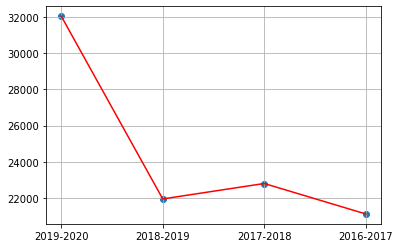

In [15]:


plt.plot(df.ANNE_UNIVERSITAIRE,df.NombreETUD, color='r')
#plt.plot(df.ANNEE_DEB,df.NombreETUD, color='b')
X= df.ANNE_UNIVERSITAIRE
#selection de deuxième colonnes de notre dataset (le profit effectué)
Y= df.NombreETUD 
 
axes = plt.axes()
axes.grid() # dessiner une grille pour une meilleur lisibilité du graphe
plt.scatter(X,Y) # X et Y sont les variables qu'on a extraite dans le paragraphe précédent
plt.show()


In [20]:
# converte string to date 
date_str = '09-19-2018'

date_object = datetime.strptime(date_str, '%m-%d-%Y').date()
print(type(date_object))
print(date_object)  # printed in default formatting

<class 'datetime.date'>
2018-09-19


In [6]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")


In [23]:
stepwise_fit=auto_arima(df.NombreETUD,trace=True ,suppress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.13 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=82.479, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=84.574, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.10 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=94.324, Time=0.00 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.315 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                    4
Model:                        SARIMAX   Log Likelihood                 -39.239
Date:                Sun, 20 Jun 2021   AIC                             82.479
Time:                        19:31:05   BIC                             81.251
Sample:                             0   HQIC                            79.785
                                  - 4                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   2.448e+04   8211.914      2.981      0.003    8385.945    4.06e+04
sigma2      1.942e+07   6.38e+07      0.304      0.761   -1.06e+08    1.45e+08
===================================================================================
Ljung-Box (L1) (Q):                   0.11   Jarque-Bera (JB):                 0.88
Prob(Q):                              0.74   Prob(JB):                         0.64
Heteroskedasticity (H):                nan   Skew:                             1.09
Prob(H) (two-sided):                   nan   Kurtosis:                         2.29
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [45]:
from statsmodels.tsa.arima_model import ARIMA

print(df.shape)
train=df.iloc[:6]
test=df.iloc [7:]
print(train.shape,test.shape)

In [46]:
print(df.shape) 
train=df.iloc[:6]
test=df.iloc [7:]
print(train.shape,test.shape)

(4, 9)
(4, 9) (0, 9)


In [79]:
# train models
model= ARIMA(train['NombreETUD'] ,order=(0,0,0))
model_fit=model.fit()
model=model_fit.summary()

print(model)


                              ARMA Model Results                              
Dep. Variable:             NombreETUD   No. Observations:                    4
Model:                     ARMA(0, 0)   Log Likelihood                 -39.239
Method:                           css   S.D. of innovations           4406.716
Date:                Sun, 20 Jun 2021   AIC                             82.479
Time:                        20:19:15   BIC                             81.251
Sample:                             0   HQIC                            79.785
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.448e+04   2203.358     11.111      0.000    2.02e+04    2.88e+04


In [83]:
start=len(train)
#print(start)
end=len(train)+len(test)-1
#print(end)
#pred=model.predict(start=start,end=end,typ='levels')
pred=model.predict(start=start,end=end,typ='levels')

print(pred)
#pred.index=df.index[start:end+1]

AttributeError: 'Summary' object has no attribute 'predict'

start=len(train)
end=len(train)-len(test)-1
pred=model.predict(start=start,end=end,typ='levels')
print(pred)
pred.index=df.index[start:end+1]

In [77]:
pred.plot(legend=True)
test['NombreETUD'].plot(legend=True)

NameError: name 'pred' is not defined

In [59]:
df['NombreETUD'].mean() #test['NombreETUD'].mean()

24481.0

In [54]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(pred,test['NombreETUD']))

print(rmse)

NameError: name 'pred' is not defined

In [55]:
model2= ARIMA(train['NombreETUD'] ,order=(0,0,1))
model2=model2.fit()
df.tail()

,Total_admis,Taux_Des_Admins,redoublant,TAUX_DE_REDOUBLANT,exclus,Taux_des_exclus,NombreETUD,ANNEE_DEB,ANNE_UNIVERSITAIRE
0,22526,"70,30 %",700,"2,18 %",NaN,NaN,32044,2019,2019-2020
1,19508,"88,87 %",2864,"13,05 %",4.0,"0,02 %",21952,2018,2018-2019
2,17176,"75,32 %",2020,"8,86 %",NaN,NaN,22804,2017,2017-2018
3,15264,"72,26 %",3304,"15,64 %",NaN,NaN,21124,2016,2016-2017


In [61]:
# futur dates
index_future_dates=pd.date_range(start='2020', end='2025')
pred=model2.predict(start=len(df),end=len(df)+5,typ='levels'.rename(Arima_Prediction)
pred.index_future_dates
print(pred)

SyntaxError: invalid syntax (<ipython-input-61-6d192b9d6e17>, line 4)

In [62]:
pred.plot(figsize=(12,5),legend=True)

NameError: name 'pred' is not defined